# url: https://www.salesanalytics.co.jp/column/no00232/

## 上記以前の段階
    第233話｜課題発見型データ分析と課題解決型データ分析
url: https://www.salesanalytics.co.jp/column/no00233/

特徴量エンジニアリング（feature engineering）は、私がデータ分析を始めた20数年前から非常に重要なものでした。

    特徴量（feature）とは、数理モデルの説明変数Xを指します。

ドメイン（データ活用の現場）理解とデータ理解なくしては、特徴量エンジニアリング（feature engineering）は非常に難しいものです。

    データ理解のためのデータ分析の技術がEDA（探索的データ分析）です。

では、何のために特徴量エンジニアリング（feature engineering）を実施するのでしょうか？

ざっくり言うと、以下の2つです。

    適切なデータセットを作る
    数理モデルのパフォーマンスを上げる
    
構築する数理モデルが予測モデルであれば、それは予測精度を上げるということです。構築するモデルが構造理解（要因分析など）のためのものであれば、それは起こった現象の再現性が高い（納得性がある）ということです。

今回は、「3タイプの特徴量エンジニアリング（feature engineering）基礎テクニック」というお話しをします。

RやPythonなどのツールを使ったデモ的なものはございません。また文字ばかりで眠くなるかもしれません。

# 3つの特徴量エンジニアリング（feature engineering）

特徴量エンジニアリング（feature engineering）は、ざっくり3タイプあります。

    特徴編集（Feature Editing）
    特徴抽出（Feature Extraction）
    特徴選択（Feature Selection）

特徴抽出（Feature Extraction）で特徴量を増やし、特徴選択（Feature Selection）で減らします。

特徴編集（Feature Editing）は、簡単に言うと変数変換や特徴量をまとめたりすることです。

## 特徴編集（Feature Editing）
説明の簡単な、特徴編集（Feature Editing）からお話しします。

よくある特徴編集（Feature Editing）はスケーリングです。例えば、以下です。

    標準化（Standardization）
    正規化（Normalization）
    対数変換（Log Transform）

他にも、色々な変換が考えられることでしょう。

さらに、特徴量同士を足したり引いたり四則演算したりし新たな特徴量を作ったり、意味のある特徴量でグルーピングし新たな特徴量を作ったりします。

特徴編集（Feature Editing）を実施するとき、元の変数を残すかどうかという問題が起こります。残せば、どんどん特徴量が増えます。

In [1]:
# 標準化（Standardization）は、データの特徴量を平均が0、標準偏差が1になるように変換するプロセスです。
# これにより、異なる尺度を持つ特徴量の影響を均一化し、機械学習モデルの性能向上に寄与します。
# 以下に、Pythonの具体例を挙げて標準化の手法を説明します。
from sklearn.preprocessing import StandardScaler
import pandas as pd

# サンプルデータの作成
data = {'特徴量1': [10, 20, 30, 40, 50],
        '特徴量2': [2, 5, 7, 9, 11]}

df = pd.DataFrame(data)

# StandardScalerを使用した標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 標準化前のデータ
display("標準化前のデータ:\n", df)

# 標準化後のデータ
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
display("\n標準化後のデータ:\n", scaled_df)

# この例では、2つの特徴量を持つデータセットを作成し、StandardScaler を使用して標準化しています。
# fit_transform メソッドを呼び出して、標準化を実施します。最終的に標準化されたデータが得られ、それを新たなDataFrameに格納しています。

# 標準化後のデータでは、各特徴量の平均が0、標準偏差が1になっていることが確認できます。
# このように標準化されたデータは、異なる尺度を持つ特徴量を同じスケールに揃える効果があります。

'標準化前のデータ:\n'

,特徴量1,特徴量2
0,10,2
1,20,5
2,30,7
3,40,9
4,50,11


'\n標準化後のデータ:\n'

,特徴量1,特徴量2
0,-1.414214,-1.536443
1,-0.707107,-0.576166
2,0.000000,0.064018
3,0.707107,0.704203
4,1.414214,1.344387


In [2]:
# 正規化（Normalization）は、データの特徴量を一定の範囲にスケーリングするプロセスです。
# 通常、特徴量を0から1の範囲に変換します。正規化は、異なる尺度を持つ特徴量の影響を均一化し、機械学習モデルの性能向上に寄与します。
# 以下に、Pythonの具体例を挙げて正規化の手法を説明します。
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# サンプルデータの作成
data = {'特徴量1': [10, 20, 30, 40, 50],
        '特徴量2': [2, 5, 7, 9, 11]}

df = pd.DataFrame(data)

# MinMaxScalerを使用した正規化
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# 正規化前のデータ
display("正規化前のデータ:\n", df)

# 正規化後のデータ
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
display("\n正規化後のデータ:\n", normalized_df)

# この例では、2つの特徴量を持つデータセットを作成し、MinMaxScaler を使用して正規化しています。
# fit_transform メソッドを呼び出して、正規化を実施します。最終的に正規化されたデータが得られ、それを新たなDataFrameに格納しています。

# 正規化後のデータでは、各特徴量が0から1の範囲にスケーリングされていることが確認できます。
# このように正規化されたデータは、異なる尺度を持つ特徴量を同じ範囲に収める効果があります。

'正規化前のデータ:\n'

,特徴量1,特徴量2
0,10,2
1,20,5
2,30,7
3,40,9
4,50,11


'\n正規化後のデータ:\n'

,特徴量1,特徴量2
0,0.00,0.000000
1,0.25,0.333333
2,0.50,0.555556
3,0.75,0.777778
4,1.00,1.000000


In [3]:
pip install japanize-matplotlib

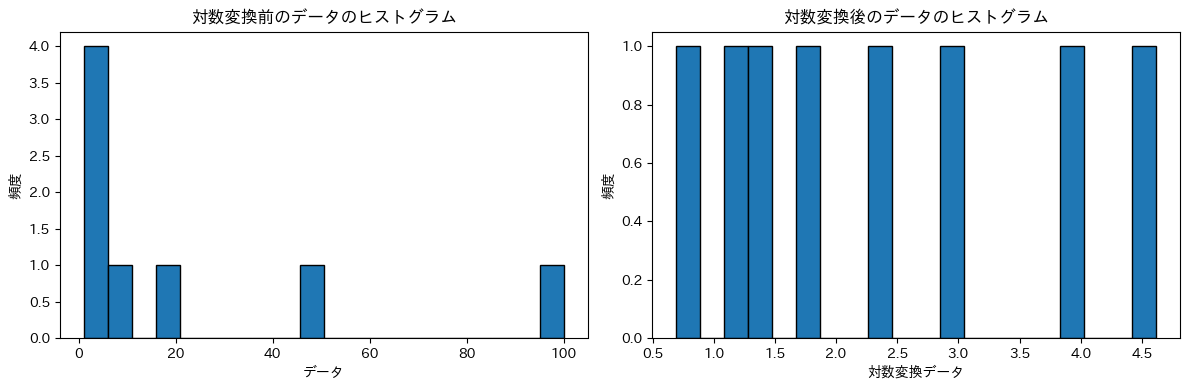

'対数変換後のデータ:\n'

,対数変換データ
0,0.693147
1,1.098612
2,1.386294
3,1.791759
4,2.397895
5,3.044522
6,3.931826
7,4.615121


In [4]:
# 対数変換（Log Transform）は、データの対数を取る変換手法で、特に正の偏り（右の裾が長い）を持つデータを対数スケールに変換するのによく使用されます。
# この変換は、データの変動を抑制し、外れ値の影響を軽減する効果があります。以下に、Pythonの具体例を挙げて対数変換の手法を説明します。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# サンプルデータの作成（対数変換が有効なデータ）
data = {'データ': [1, 2, 3, 5, 10, 20, 50, 100]}
df = pd.DataFrame(data)

# 対数変換前のデータのヒストグラム
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['データ'], bins=20, edgecolor='black')
plt.title('対数変換前のデータのヒストグラム')
plt.xlabel('データ')
plt.ylabel('頻度')

# 対数変換
df['対数変換データ'] = np.log1p(df['データ'])  # log1p関数はlog(1 + x)を計算

# 対数変換後のデータのヒストグラム
plt.subplot(1, 2, 2)
plt.hist(df['対数変換データ'], bins=20, edgecolor='black')
plt.title('対数変換後のデータのヒストグラム')
plt.xlabel('対数変換データ')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

# 対数変換後のデータ
display("対数変換後のデータ:\n", df[['対数変換データ']])

# この例では、正の偏りを持つデータを作成し、対数変換を行っています。
# 左が対数変換前のデータのヒストグラムであり、右が対数変換後のデータのヒストグラムです。
# 対数変換により、データの分布が正規分布に近づくことが期待されます。対数変換後のデータを表示しています。

## 特徴抽出（Feature Extraction）

比較的よく使う3つの特徴抽出（Feature Extraction）を紹介します。

    分割（Split）
    エンコーディング（Encoding）
    欠測値補完（Imputation）

### 分割（Split）
1つの特徴量（変数）をもとに、複数の特徴量（変数）を作ります。

分かりやすい例ですと、「年月日（yyyymmdd）」を「年（yyyy）」「月（mm）」「日（dd）」に分割する、といったものです。ダイレクトにもとの特徴量をある区切りで分割しています。

よくあるやり方は、元の特徴量をカテゴリー化（例：ビン分割など）し、このあと説明するエンコーディング（Encoding）で複数の特徴量にするやり方です。

例えば、元の特徴量「商品名」に対し「大カテゴリー」「中カテゴリー」「小カテゴリー」などの情報を特徴量として新たに追加するという感じです。

最初に例としてあげた「年月日（yyyymmdd）」も、「年（yyyy）」によるグループ化、「月（mm）」によるグループ化、「日（dd）」によるグループ化、といった感じでグループ化という考え方でも説明できます。

元の特徴量が数値のときは、カテゴリー化するときに適当な境界で区切りビン分割（binning）し、このあと説明するエンコーディング（Encoding）で複数の特徴量に分割することがあります。

ビン分割（binning）とは、データを何かしらの基準に沿って分割することで、数値データのときに作成するヒストグラムの階級（ヨコ軸）をイメージして頂くと分かりやすいと思います。

「大カテゴリー」「中カテゴリー」「小カテゴリー」の例もある種の、ビン分割になります。個々の商品を大カテゴリーという粒度によるビン分割、中カテゴリーという粒度によるビン分割、小カテゴリーという粒度によるビン分割し、それぞれのビン分割で新たな特徴量を作るという感じです。

In [5]:
# Pythonを使用して、分割（Split）およびビン分割（Binning）の具体例を示します。
# 具体的な例として、日付の文字列を分割し、数値のビン分割を行います。

# 1. 日付の文字列を分割する例:
import pandas as pd

# サンプルデータの作成
data = {'date': ['20220101', '20220215', '20220330']}
df = pd.DataFrame(data)

# 日付の文字列を年、月、日に分割
df['year'] = df['date'].str[:4]
df['month'] = df['date'].str[4:6]
df['day'] = df['date'].str[6:]

display("元のデータ:\n", df[['date']])
display("\n分割後のデータ:\n", df[['year', 'month', 'day']])

# この例では、date 列の日付文字列を分割し、year、month、day の3つの新しい特徴量を作成しています。

# 2. 数値のビン分割の例:
import pandas as pd

# サンプルデータの作成
data = {'value': [5, 15, 25, 35, 45, 55, 65, 75]}
df = pd.DataFrame(data)

# 数値をビン分割
bins = [0, 20, 40, 60, 80]
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4']
df['value_bin'] = pd.cut(df['value'], bins = bins, labels = labels, include_lowest=True)

display("元のデータ:\n", df[['value']])
display("\nビン分割後のデータ:\n", df[['value_bin']])

# この例では、value 列の数値データをビン分割し、新しい特徴量 value_bin を作成しています。
# pd.cut() 関数を使用して、指定したビン（区切り）に基づいてデータを分割しています。

# これらの手法を使用することで、元の特徴量を基にして新しい特徴量を生成し、モデルの性能向上や異なる特徴量の表現を試みることができます。

'元のデータ:\n'

,date
0,20220101
1,20220215
2,20220330


'\n分割後のデータ:\n'

,year,month,day
0,2022,01,01
1,2022,02,15
2,2022,03,30


'元のデータ:\n'

,value
0,5
1,15
2,25
3,35
4,45
5,55
6,65
7,75


'\nビン分割後のデータ:\n'

,value_bin
0,Bin1
1,Bin1
2,Bin2
3,Bin2
4,Bin3
5,Bin3
6,Bin4
7,Bin4


## エンコーディング（Encoding）

主にカテゴリカルな特徴量に対し実施します。カテゴリカルな特徴量とは、「1:受注、2:失注」や「1:ヘビー顧客、2:ミドル顧客、3:ライト顧客」みたいなデータです。

比較的よく使う3つのエンコーディング（Encoding）です。

    One Hot Encoding/Vectorization
    Index Based Encoding
    順序付きOne Hot Encoding

### One Hot Encoding/Vectorization
One Hot Encodingは、カテゴリカルな特徴量をダミーコード化（0-1データ）することです。

例えば、「1:ヘビー顧客、2:ミドル顧客、3:ライト顧客」の3カテゴリーの場合、3つの0-1変数（特徴量）が作られ、該当する場合に1を、そうでない場合に0が入ります。

1つの特徴量が複数の特徴量になりベクトル化するのでVectorizationとも言います。

In [6]:
# One Hot Encoding/Vectorizationの例:
import pandas as pd

# サンプルデータの作成
data = {'顧客タイプ': [1, 2, 3, 1, 2]}
df = pd.DataFrame(data)

# One Hot Encodingの実施
one_hot_encoded = pd.get_dummies(df['顧客タイプ'], prefix='顧客タイプ')

display("元のデータ:\n", df[['顧客タイプ']])
display("\nOne Hot Encoding後のデータ:\n", one_hot_encoded)

# この例では、顧客タイプ 列のカテゴリカルなデータを One Hot Encoding しています。
# 新しいダミーコード（0-1データ）が作成され、各カテゴリに対応する列が追加されます。

'元のデータ:\n'

,顧客タイプ
0,1
1,2
2,3
3,1
4,2


'\nOne Hot Encoding後のデータ:\n'

,顧客タイプ_1,顧客タイプ_2,顧客タイプ_3
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


### Index Based Encoding
Index Based Encodingは、例えばテキストデータ（文章）に対し形態素解析し単語を抽出し、その単語に該当する数字（Index）を割り振ることで数字の列を作ることです。

他にも、顧客の購買した商品の順序を表現したり（例：商品A(id:982)→商品C(id:519)→商品B(id:167)などを982519167と表現）する感じです。

In [7]:
# Index Based Encoding（インデックスベースのエンコーディング）は、テキストデータやカテゴリカルデータを数値に変換する手法です。
# 具体的な例として、テキストデータの形態素解析を行い、各単語に対して一意のインデックスを割り振ります。
# また、購買した商品の順序を表現する例も示します。

# 1. テキストデータの Index Based Encoding の例:
from sklearn.preprocessing import LabelEncoder

# サンプルデータの作成
data = {'テキストデータ': ['猫', '犬', '鳥', '犬', '鳥']}
df = pd.DataFrame(data)

# LabelEncoderを使用した Index Based Encoding
label_encoder = LabelEncoder()
df['テキストデータ_Index'] = label_encoder.fit_transform(df['テキストデータ'])

display("元のデータ:\n", df[['テキストデータ']])
display("\nIndex Based Encoding後のデータ:\n", df[['テキストデータ_Index']])

# この例では、テキストデータ 列のテキストデータを LabelEncoder を使用して Index Based Encoding しています。
# 各単語に一意のインデックスが割り振られます。

# 2. 商品購買順序の Index Based Encoding の例:
# サンプルデータの作成
data = {'購買順序': ['商品A', '商品C', '商品B', '商品A', '商品B']}
df = pd.DataFrame(data)

# 商品の一意なIDを用意する（実際のデータでは商品IDが利用される）
product_ids = {'商品A': 982, '商品B': 167, '商品C': 519}

# 商品IDへの変換
df['商品ID'] = df['購買順序'].map(product_ids)

display("元のデータ:\n", df[['購買順序']])
display("\n商品IDへの変換後のデータ:\n", df[['商品ID']])

# この例では、購買した商品の順序を表現するデータがあり、各商品に一意なIDが割り振られていると仮定します。
# map() メソッドを使用して商品名から商品IDに変換しています。

# これらの手法を使用することで、テキストデータやカテゴリカルデータを数値データに変換し、機械学習モデルに適した形にすることができます。

'元のデータ:\n'

,テキストデータ
0,猫
1,犬
2,鳥
3,犬
4,鳥


'\nIndex Based Encoding後のデータ:\n'

,テキストデータ_Index
0,1
1,0
2,2
3,0
4,2


'元のデータ:\n'

,購買順序
0,商品A
1,商品C
2,商品B
3,商品A
4,商品B


'\n商品IDへの変換後のデータ:\n'

,商品ID
0,982
1,519
2,167
3,982
4,167


###順序付きOne Hot Encoding
Index Based Encodingした特徴量よりもOne Hot Encoding/Vectors encodingを実施した特徴量の方が、データとしては扱いやすいですが、順序性（時間の概念や前後関係などを導入）が消えてしまいます。

順序付きOne Hot Encodingというのがあります。

通常のOne Hot Encodingには順序性はありませんが、それに順序性（時間の概念や前後関係などを導入）したものです。

順序付きOne Hot Encodingを実施すると、膨大な0-1で表現された特徴量が出来上がります。

In [8]:
# 順序付き One Hot Encoding は、通常の One Hot Encoding に順序性を導入する手法です。
# この手法は、カテゴリカルな特徴量に順序性があり、それを数値的に表現したい場合に使用されます。
# 以下に、Pythonの具体例を挙げて説明します。
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# サンプルデータの作成
data = {'カテゴリ特徴量': ['低', '中', '高', '中', '低']}
df = pd.DataFrame(data)

# One Hot Encodingを実施（通常の One Hot Encoding）
encoder = OneHotEncoder(sparse = False, drop = 'first')  # drop='first' で最初の列を削除
one_hot_encoded = encoder.fit_transform(df[['カテゴリ特徴量']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(['カテゴリ特徴量']))

display("通常の One Hot Encoding後のデータ:\n", one_hot_df)

# 順序付き One Hot Encodingを実施
order_mapping = {'低': 1, '中': 2, '高': 3}
df['順序付きカテゴリ特徴量'] = df['カテゴリ特徴量'].map(order_mapping)

display("\n順序付き One Hot Encoding前のデータ:\n", df[['順序付きカテゴリ特徴量']])

# One Hot Encodingを実施（順序付き One Hot Encoding）
encoder_order = OneHotEncoder(sparse = False)
one_hot_encoded_order = encoder_order.fit_transform(df[['順序付きカテゴリ特徴量']])
one_hot_df_order = pd.DataFrame(one_hot_encoded_order, columns = encoder_order.get_feature_names_out(['順序付きカテゴリ特徴量']))

display("\n順序付き One Hot Encoding後のデータ:\n", one_hot_df_order)

# この例では、通常の One Hot Encoding と順序付き One Hot Encoding を比較しています。
# 通常の One Hot Encoding では、drop='first' を指定して最初の列を削除しています。
# 順序付き One Hot Encoding では、順序性を持つカテゴリカルな特徴量を数値にマッピングし、それに対して通常の One Hot Encoding を実施しています。
# これにより、順序性が保持されたまま膨大な0-1の特徴量が得られます。

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


'通常の One Hot Encoding後のデータ:\n'

,カテゴリ特徴量_低,カテゴリ特徴量_高
0,1.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0


'\n順序付き One Hot Encoding前のデータ:\n'

,順序付きカテゴリ特徴量
0,1
1,2
2,3
3,2
4,1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


'\n順序付き One Hot Encoding後のデータ:\n'

,順序付きカテゴリ特徴量_1,順序付きカテゴリ特徴量_2,順序付きカテゴリ特徴量_3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


# 欠測値補完（Imputation）
手に入れたデータセットの中の一部が欠測していたり、明らかに可笑しなデータ（異常値など）が混入していることがあります。

欠測の発生具合や異常値の混入具合が酷い場合にはどうしようもありませんが、少数であるならば何かしらのデータで埋めたいところです。

## 異常検知の方法
先ず、可笑しなデータ（異常値など）の見つけ方を説明します。

2つの方法があります。

    視覚化して探す
    異常検知の手法を使う

# 視覚化して探す
基本は視覚化し探すことです。

視覚化し探すとは、データをグラフで表現し明らかに他のデータから外れているデータを探すことです。

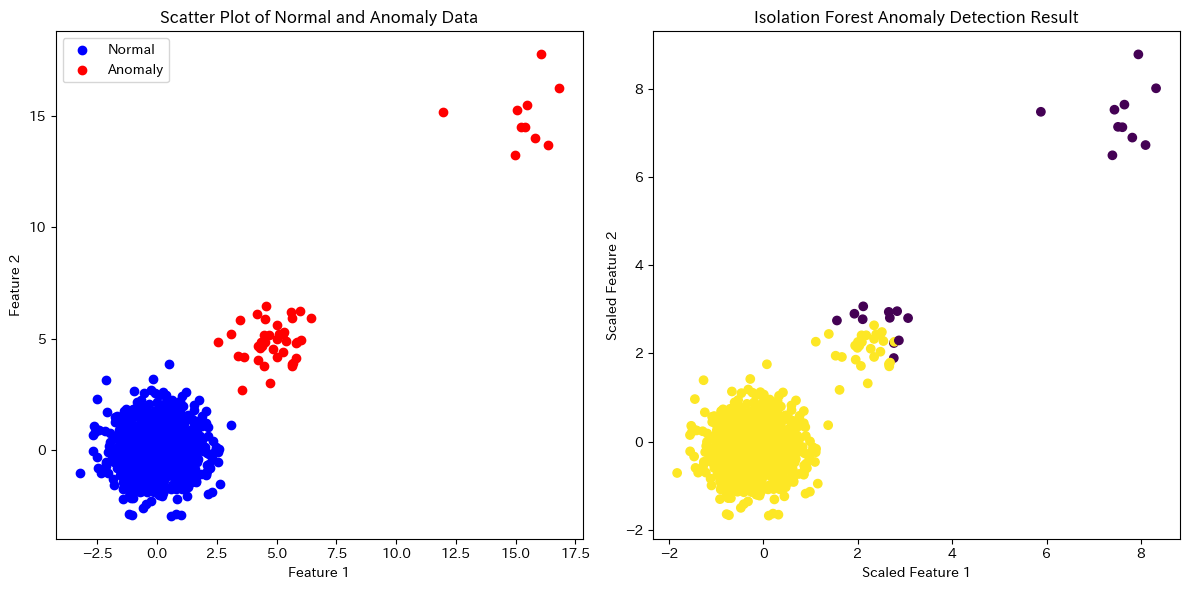

In [9]:
# 異常検知では、データセット内の異常なパターンや外れ値を視覚化して探すことが一般的です。
# 以下に、Pythonの具体例を挙げて異常検知のための視覚化手法を説明します。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# サンプルデータの生成
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))
anomaly_data = np.random.normal(loc=5, scale=1, size=(50, 2))

# 異常データの一部を外れ値に変更
anomaly_data[10:20, :] += 10

# データセットの結合
data = np.vstack([normal_data, anomaly_data])
labels = np.concatenate([np.zeros(len(normal_data)), np.ones(len(anomaly_data))])

# データの標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Isolation Forest モデルの適用
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(scaled_data)
pred_labels = model.predict(scaled_data)

# 結果の視覚化
plt.figure(figsize=(12, 6))

# 正常データの散布図
plt.subplot(1, 2, 1)
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Normal', c='blue')
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], label='Anomaly', c='red')
plt.title('Scatter Plot of Normal and Anomaly Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Isolation Forest による異常検知結果の視覚化
plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=pred_labels, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection Result')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

plt.tight_layout()
plt.show()

# この例では、Isolation Forestを使用して異常検知を行います。
# 正常データと異常データの散布図と、Isolation Forestによる異常検知結果を視覚化しています。
# 異常データは外れ値として視覚的に特定されています。このような手法を使用することで、異常データの特徴を把握し、効果的に検知することができます。



# Isolation Forest（孤立した森）は、外れ値（異常値）検知のための機械学習アルゴリズムの一つです。この手法は、2008年にFei Tony Liu、Kai Ming Ting、Zhou Zhi-Huaによって提案されました。
# Isolation Forestは、異常値がデータセット内で孤立していることを利用して検出します。通常のデータポイントは他のデータと似た傾向を持っており、それに対して異常値は他のデータからは孤立しています。
# この特性を利用することで、異常値の検知を高速かつ効果的に行うことができます。

# Isolation Forestの主なアイデアは以下の通りです：
# ランダムなサンプリング: データセットからランダムに特徴量を選択し、その特徴量の最小値と最大値の範囲を定義します。
# 外れ値の検出: 外れ値は、通常のデータよりも早くランダムに選択される傾向があります。これにより、異常値はより短いパス（木の深さ）で見つかる可能性が高まります。
# 木の構築: 上記の手順を再帰的に繰り返し、木を構築します。異常値は通常、他のデータよりも浅い深さで木に到達します。
# 異常スコアの計算: データポイントの異常スコアは、それが木に到達するまでの平均深さを基に計算されます。異常値は通常、より浅い深さで木に到達するため、異常スコアが低くなります。

# Isolation Forestは、高次元データや大規模データセットに対しても効果的で、計算効率が高いため広く利用されています。
# 異常検知や外れ値検知の一手法として、Isolation Forestは特に単純で強力な手法の一つと言えます。



# Isolation Forestってone-class classificationと同じという認識でいいの?

# はい、その通りです。Isolation Forestは、外れ値検知（異常検知）の手法であり、一クラス分類（One-Class Classification）の一種です。
# 一クラス分類は、通常の分類問題とは異なり、データの大部分が特定のクラスに属している場合に、そのクラスに属さない外れ値（異常値）を検出する問題を指します。

# Isolation Forestは、通常のデータと異常値との違いを利用して異常値を検出する手法であり、データセットの正常なデータの特徴を学習し、
# それに異常なデータがどれだけ違うかを評価します。 これにより、異常値の検出を行うことができます。

# 一般的な一クラス分類手法では、サポートベクターマシン（Support Vector Machine, SVM）や密度推定ベースの手法などもありますが、
# Isolation Forestはデータの分割にランダム性を導入することで、効率的かつ高い性能で異常検知を実現しています。

# 異常検知の手法を使う
もう一つの方法が、異常検知の手法を使うやり方です。

目で見て探す視覚化よりも高速に探すことができますが、ざっくりしていますので、異常検知されたデータは必ずグラフ化して目で確認しましょう。

伝統時には、標準偏差や分散を活用したもの、パーセンタイルを活用したものがあります。ここでは多くは話しませんが、異常検知で調べてもらうと、色々な手法が紹介されていると思います。

ちなみに、QC7道具の管理図は、視覚的かつ統計学的に異常値を探るものです。

# 欠測値補完の方法

次に、欠測値補完の方法です。

2つの方法があります。

    数値データに対する欠測値補完
    カテゴリカルデータに対する欠測値補完

要するに、欠測しているデータが数値なのかカテゴリカルなのかで、やり方が変わります。

## 簡単な方法
一番簡単なのは、数値データであれば平均値を代入する方法、カテゴリカルデータであれば最頻値を代入する方法などでしょう。

欠測していないデータで分布を求め、その分布に従う乱数を発生させることで、ランダムな値を代入する方法も非常に簡単です。

他には、欠測値している特徴量を目的変数yにした予測モデルやマッチングモデルを構築し、欠測している値を予測するというものです。

In [10]:
# SimpleImputerは、scikit-learnライブラリの一部で、欠測値を補完するためのシンプルな手段を提供するクラスです。
# 具体的には、平均値、中央値、最頻値などを用いて欠測値を補完するための基本的な方法を提供しています。

# SimpleImputerクラスは、以下のような主なパラメータを持っています：
# strategy: 欠測値を補完する際に使用する統計量を指定します。一般的な選択肢には、'mean'（平均値）、'median'（中央値）、'most_frequent'（最頻値）があります。
# fill_value: 欠測値を補完するための固定の値を指定できます。これはstrategyが'constant'の場合に使用されます。
# missing_values: 欠測値を指定するための値です。デフォルトではnp.nanが使われます。
# fill_value: 欠測値を補完する場合に使用される値を指定します。strategyが'constant'の場合に使用されます。

# 数値データの欠測値補完:
import pandas as pd
from sklearn.impute import SimpleImputer

# ダミーデータの作成
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, 4, 3, np.nan, 1],
        'C': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)

# 欠測値を含む列の確認
display("欠測値補完前:")
display(df)

# 欠測値を平均値で補完
imputer = SimpleImputer(strategy='mean')
df[['A', 'B']] = imputer.fit_transform(df[['A', 'B']])

display("\n欠測値補完後:")
display(df)

# 上記の例では、SimpleImputerクラスを使用して、strategy='mean'を指定して平均値で欠測値を補完しています。

'欠測値補完前:'

,A,B,C
0,1.0,5.0,10
1,2.0,4.0,20
2,NaN,3.0,30
3,4.0,NaN,40
4,5.0,1.0,50


'\n欠測値補完後:'

,A,B,C
0,1.0,5.00,10
1,2.0,4.00,20
2,3.0,3.00,30
3,4.0,3.25,40
4,5.0,1.00,50


In [11]:
# カテゴリカルデータの欠測値補完:
import pandas as pd
from sklearn.impute import SimpleImputer

# ダミーデータの作成
data = {'A': ['red', 'blue', np.nan, 'green', 'red'],
        'B': ['small', 'large', 'medium', np.nan, 'small'],
        'C': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)

# 欠測値を含む列の確認
display("欠測値補完前:")
display(df)

# 欠測値を最頻値で補完
imputer = SimpleImputer(strategy='most_frequent')
df[['A', 'B']] = imputer.fit_transform(df[['A', 'B']])

display("\n欠測値補完後:")
display(df)

# 上記の例では、SimpleImputerクラスを使用して、strategy='most_frequent'を指定して最頻値で欠測値を補完しています。

'欠測値補完前:'

,A,B,C
0,red,small,10
1,blue,large,20
2,NaN,medium,30
3,green,NaN,40
4,red,small,50


'\n欠測値補完後:'

,A,B,C
0,red,small,10
1,blue,large,20
2,red,medium,30
3,green,small,40
4,red,small,50


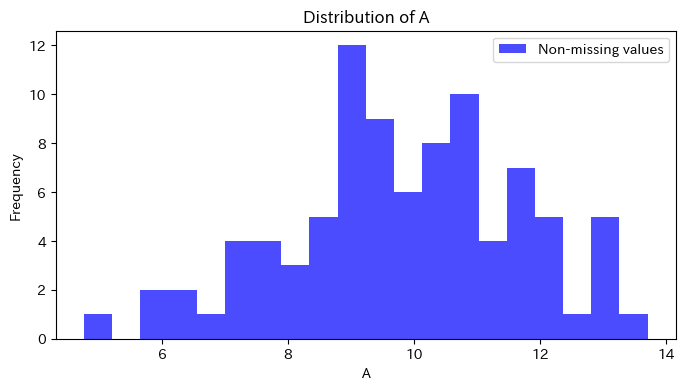

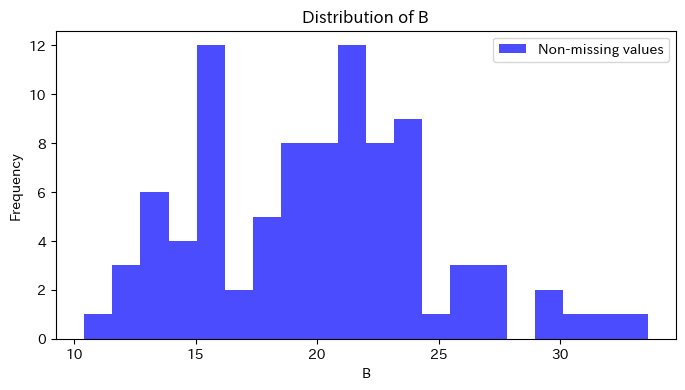

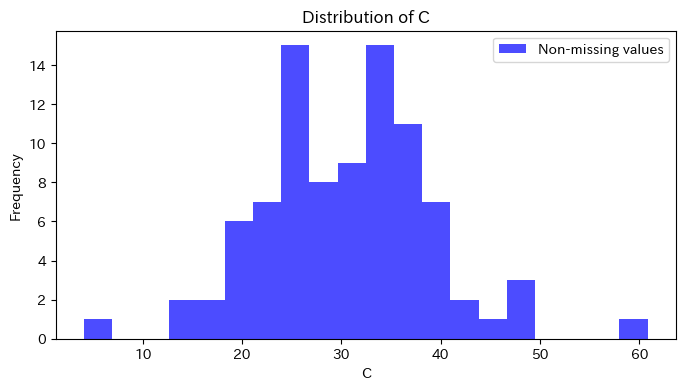

,A,B,C
0,10.993428,12.923146,32.862299
1,9.723471,17.896773,34.486276
2,11.295377,18.286427,38.664410
3,13.046060,15.988614,38.430416
4,9.531693,19.193571,18.978645
...,...,...,...
95,7.072970,21.926587,24.456723
96,10.592241,15.580713,37.196799
97,10.522111,20.768626,32.458396
98,10.010227,20.291044,36.502897


In [12]:
# 欠測していないデータの分布を求め、その分布に従う乱数を生成して欠測値を代入する方法は、データの特性を保ちつつ欠測値を補完する手法の一つです。
# 以下は、Pythonの具体例です。この例では、正規分布に従う乱数を生成して欠測値を補完します。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# サンプルデータの生成
np.random.seed(42)
data = {'A': np.random.normal(loc=10, scale=2, size=100),
        'B': np.random.normal(loc=20, scale=5, size=100),
        'C': np.random.normal(loc=30, scale=8, size=100)}

# 一部のデータを欠測値に変更
data['A'][20:30] = np.nan
data['B'][50:60] = np.nan
data['C'][80:90] = np.nan

df = pd.DataFrame(data)

# 欠測値を含む列の分布を可視化
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=20, color='blue', alpha=0.7, label='Non-missing values')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# 正規分布に基づいた欠測値の補完
def impute_with_distribution(column):
    non_missing_values = df[column].dropna()
    mean = non_missing_values.mean()
    std = non_missing_values.std()
    size = df[column].isnull().sum()
    random_values = np.random.normal(loc=mean, scale=std, size=size)
    df[column][df[column].isnull()] = random_values

# 欠測値の補完
for column in df.columns:
    impute_with_distribution(column)

# 補完後のデータを確認
display(df)

# この例では、各列ごとに欠測値を含む部分の分布を可視化し、その分布に基づいて欠測値を正規分布に従う乱数で補完しています。
# 分布に基づく補完は、データの特性を考慮しながらランダムな値を代入する手法です。ただし、データの実際の特性によっては他の分布や手法を検討することが重要です。

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# サンプルデータの生成
np.random.seed(42)
data = {'A': np.random.normal(loc=10, scale=2, size=100),
        'B': np.random.normal(loc=20, scale=5, size=100),
        'C': np.random.normal(loc=30, scale=8, size=100)}

# 一部のデータを欠測値に変更
data['A'][20:30] = np.nan
data['B'][50:60] = np.nan
data['C'][80:90] = np.nan

df = pd.DataFrame(data)

# 欠測していない値を持つ列を目的変数yとして選択
target_column = 'A'  # 予測対象の列
y = df[target_column].dropna()

# 欠測していない値を持つ行を取得
non_missing_rows = df.dropna(subset=[target_column])

# 目的変数を除いた特徴量Xを取得
X = non_missing_rows.drop(target_column, axis=1)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# HistGradientBoostingRegressorの構築
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# モデルの評価（例として平均二乗誤差を使用）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 欠測値を含む列の欠測値を予測
impute_target = df[df[target_column].isnull()].drop(target_column, axis=1)
predicted_values = model.predict(impute_target)

# 予測した値を元のDataFrameに代入
df.loc[df[target_column].isnull(), target_column] = predicted_values

# 補完後のデータを確認
display("補完後:\n", df)



# この例では、HistGradientBoostingRegressorを使用しています。
# このモデルは欠損値を直接扱える特徴があり、LinearRegressionのように欠損値があるとエラーになることはありません。

# HistGradientBoostingRegressor（以下、HGBRegressor）は、scikit-learnライブラリにおけるGradient Boostingの一種であり、特に大規模なデータセットに対して効率的に動作するように設計されています。
# HGBRegressorはヒストグラム勾配ブースティング（Histogram-Based Gradient Boosting）として知られており、勾配ブースティングのアルゴリズムを基にしていますが、データをビンに分割し、ヒストグラムを使用することで高速な学習を実現しています。

# 以下は、HistGradientBoostingRegressorの主な特徴とパラメータについての説明です：
# ヒストグラム勾配ブースティング： データをビンに分割し、各ビンごとに勾配を計算してから学習を進める手法。これにより、通常のGradient Boostingよりも高速な学習が可能です。
# 欠損値の扱い： HGBRegressorは欠損値を直接扱うことができます。欠損値があってもモデルのトレーニングや予測が行えます。
# 効率的な学習： 大規模なデータセットに対しても効率的に動作します。通常のGradient Boostingよりも高速でメモリ効率が良いです。
# LightGBMとの類似性： HGBRegressorはLightGBMに類似しており、大規模なデータセットに対する処理速度と性能が向上しています。

Mean Squared Error: 2.921521106663801


'補完後:\n'

,A,B,C
0,10.993428,12.923146,32.862299
1,9.723471,17.896773,34.486276
2,11.295377,18.286427,38.664410
3,13.046060,15.988614,38.430416
4,9.531693,19.193571,18.978645
...,...,...,...
95,7.072970,21.926587,24.456723
96,10.592241,15.580713,37.196799
97,10.522111,20.768626,32.458396
98,10.010227,20.291044,36.502897


# 多重補完法（multiple imputation）

なんとなくてすが……　機械学習のスタンスの場合には、ある特定の値を1つ代入する単一値代入法（single imputation）を使うことが多い気がします。

一方、数理統計学的なスタンスのときは、多重補完法（multiple imputation）を使うことが多いです。

多重補完法（multiple imputation）とは、複数の欠測値を補完したデータセットを構築し、それぞれのデータセットを使いデータ分析などをします。

要するに、単一値代入法（single imputation）であれば1回で済む処理を複数回実施するため、全体の処理時間が膨大になります。

例えば、1つのデータセットに対し1時間かかる処理（単一値代入法）を、多重補完法（multiple imputation）だということで100個のデータセットを作り処理を実施すると、100時間ぐらいかかるかもしれません。

この世界のデータ分析も奥が深すぎるため、ここではこれ以上のお話しはしません。分かりやすい専門書（入門的な書籍も含め）ありますので、興味ある方は調べて見てください。

In [14]:
# 単一値代入法（Single Imputation）は、欠損値を単一の値で補完する手法です。
# 代表的な方法としては、平均値、中央値、最頻値などがあります。以下に、Pythonを用いた単一値代入法の例を示します。

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs

# ダミーデータを生成
X, _ = make_blobs(n_samples=100, n_features=5, random_state=42)

# データに欠損を導入
missing_mask = np.random.rand(*X.shape) < 0.2  # 20%の欠損を導入
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# 欠損値を平均値で補完
imputer = SimpleImputer(strategy='mean')
X_imputed_mean = imputer.fit_transform(X_missing)

# 欠損値を中央値で補完
imputer_median = SimpleImputer(strategy='median')
X_imputed_median = imputer_median.fit_transform(X_missing)

# 欠損値を最頻値で補完
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
X_imputed_most_frequent = imputer_most_frequent.fit_transform(X_missing)

# 補完前後のデータを比較
display("欠損があるデータ:")
display(X_missing[:5, :])

display("\n平均値で補完後のデータ:")
display(X_imputed_mean[:5, :])

display("\n中央値で補完後のデータ:")
display(X_imputed_median[:5, :])

display("\n最頻値で補完後のデータ:")
display(X_imputed_most_frequent[:5, :])

# この例では、make_blobs を使用してダミーデータを生成し、その一部に故意に欠損を導入しています。
# SimpleImputer クラスを使用して、異なる戦略（平均値、中央値、最頻値）で欠損を補完しています。

# 欠損のメカニズムやデータの性質によっては、単一値代入法が望ましい結果を得られることもありますが、多重補完法のように不確実性を考慮する手法も検討する価値があります。

'欠損があるデータ:'

array([[-3.00263011,  9.93744874,  6.34648379,  2.8467591 , -6.87048285],
       [        nan, -9.04078528,  7.38441952,  2.66946293,  4.28754638],
       [-2.29055931,  9.89604717,  3.63079349,  0.38987547, -6.10592677],
       [-3.46369489,  8.2631067 ,  3.50945078,  2.74314704,         nan],
       [        nan,  8.85334875,  4.25161444,  1.08765731, -7.23637222]])

'\n平均値で補完後のデータ:'

array([[-3.00263011,  9.93744874,  6.34648379,  2.8467591 , -6.87048285],
       [-6.27483085, -9.04078528,  7.38441952,  2.66946293,  4.28754638],
       [-2.29055931,  9.89604717,  3.63079349,  0.38987547, -6.10592677],
       [-3.46369489,  8.2631067 ,  3.50945078,  2.74314704, -3.29904133],
       [-6.27483085,  8.85334875,  4.25161444,  1.08765731, -7.23637222]])

'\n中央値で補完後のデータ:'

array([[-3.00263011,  9.93744874,  6.34648379,  2.8467591 , -6.87048285],
       [-6.74271202, -9.04078528,  7.38441952,  2.66946293,  4.28754638],
       [-2.29055931,  9.89604717,  3.63079349,  0.38987547, -6.10592677],
       [-3.46369489,  8.2631067 ,  3.50945078,  2.74314704, -6.10592677],
       [-6.74271202,  8.85334875,  4.25161444,  1.08765731, -7.23637222]])

'\n最頻値で補完後のデータ:'

array([[ -3.00263011,   9.93744874,   6.34648379,   2.8467591 ,
         -6.87048285],
       [-12.04505717,  -9.04078528,   7.38441952,   2.66946293,
          4.28754638],
       [ -2.29055931,   9.89604717,   3.63079349,   0.38987547,
         -6.10592677],
       [ -3.46369489,   8.2631067 ,   3.50945078,   2.74314704,
         -9.01924785],
       [-12.04505717,   8.85334875,   4.25161444,   1.08765731,
         -7.23637222]])

In [15]:
pip install fancyimpute

In [16]:
# 多重補完法（Multiple Imputation）は、欠損値があるデータセットに対して、複数回の補完を行い、それらの結果を組み合わせて最終的な補完値を得る手法です。
# これにより、不確実性を考慮した統計的な推論が可能となります。Pythonで多重補完法を実装するには、fancyimpute ライブラリを使用することができます。
# データに欠損がある場合、IterativeImputer クラスを使用して多重補完を行います。
import numpy as np
from fancyimpute import IterativeImputer
from sklearn.datasets import make_blobs

# ダミーデータを生成
X, _ = make_blobs(n_samples=100, n_features=5, random_state=42)

# データに欠損を導入
missing_mask = np.random.rand(*X.shape) < 0.2  # 20%の欠損を導入
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# 多重補完法を使用して欠損値を補完
imputer = IterativeImputer(max_iter=10, random_state=42)
X_imputed = imputer.fit_transform(X_missing)

# 補完前後のデータを比較
display("欠損があるデータ:")
display(X_missing[:5, :])

display("\n多重補完後のデータ:")
display(X_imputed[:5, :])

# この例では、make_blobs を使用してダミーデータを生成し、その一部に故意に欠損を導入しています。
# IterativeImputer クラスを使って、最大で10回の反復を行いながら欠損を補完しています。

# なお、実際のデータセットに多重補完法を適用する際には、データの特性や欠損のメカニズムに応じて適切なパラメータや手法の選択が必要です。

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


'欠損があるデータ:'

array([[-3.00263011,  9.93744874,  6.34648379,  2.8467591 , -6.87048285],
       [-5.97037142, -9.04078528,  7.38441952,         nan,  4.28754638],
       [-2.29055931,         nan,  3.63079349,  0.38987547, -6.10592677],
       [        nan,  8.2631067 ,  3.50945078,  2.74314704, -5.61123767],
       [-1.88864941,  8.85334875,  4.25161444,  1.08765731,         nan]])

'\n多重補完後のデータ:'

array([[-3.00263011,  9.93744874,  6.34648379,  2.8467591 , -6.87048285],
       [-5.97037142, -9.04078528,  7.38441952,  2.84971219,  4.28754638],
       [-2.29055931,  7.90104837,  3.63079349,  0.38987547, -6.10592677],
       [-2.08752381,  8.2631067 ,  3.50945078,  2.74314704, -5.61123767],
       [-1.88864941,  8.85334875,  4.25161444,  1.08765731, -7.21915676]])

# 特徴選択（Feature Selection）

特徴選択（Feature Selection）つまり変数選択ですが、昔から色々な方法が考案されています。

この世界も色々とありすぎるため、概要のみお話しします。別の機会で、RやPyhtonなどを使い説明します。

代表的なのは、以下の3つでしょう。それぞれで、色々な手法があります。

    Filter Method
    Wrapper Method
    Embedded Method

## Filter Method

Filter Methodは、最も簡単な特徴量選択方法で、主に3種類あります。

    説明変数X（特徴量）の各統計量に基づいて選択する方法
    目的変数yと説明変数X（特徴量）の関係性を表す統計量に基づいて選択する方法
    説明変数X（特徴量）間の関係性を表す統計量に基づいて選択する方法

## 説明変数X（特徴量）の各統計量に基づいて選択する方法

バラつきが異常に小さい（分散が0など）変数を除外したり、欠測値や異常値の占める割合が異常に多い変数を除外することです。

例えば、分散が0というのは、その変数の値がすべて同じ値ということです。

例えば、欠測値や異常値の占める割合が多い場合、欠測値補完して変数を使える状態にしたとしても、どのような欠測値補完したかによってこれから実施するデータ分析やモデル構築が影響を受けるため、好ましくありません。

## 目的変数yと説明変数X（特徴量）の関係性を表す統計量に基づいて選択する方法

例えば、目的変数yと各説明変数X（特徴量）で1対1で相関係数を計算し、相関係数が異常に小さい説明変数X（特徴量）を除外するということです。

このとき、相関係数が1や-1などに異常に近い場合、疑った方がいいです。目的変数yとその説明変数X（特徴量）が実はほぼ同じ意味合いのものを別の表現でデータにしただけ、ということが起こっている可能性があります。

他にも、分散分析やカイ二乗検定を実施したりと簡単な統計学的なやり方があります。


## 説明変数X（特徴量）間の関係性を表す統計量に基づいて選択する方法

例えば、各説明変数X（特徴量）間で1対1で相関係数を計算し、相関係数の高い変数の組み合わせを見つけて、一方を除外するということです。

他にも、VIF（Variance Inflation Factor）を求めたり主成分分析を実施したりと簡単な統計学的なやり方があります。

以上の3つのFilter Methodは、データ分析やモデル構築前に必ず最初に実施すると思います。

# Wrapper Method

Filter Methodは各説明変数X（特徴量）を1つ1つ見て検討していく感じでしたが、Wrapper Methodでは説明変数X（特徴量）の組み合わせを見ていきます。

要は、Wrapper Methodは最適な説明変数X（特徴量）の組み合わせを探そうとするものです。

やり方は簡単で、次にような流れになります。

    説明変数X（特徴量）の組み合わせ決める
    数理モデルを構築する
    構築した数理モデルを評価する

最も評価の高い説明変数X（特徴量）の組み合わせを、最終的な説明変数X（特徴量）として採用します。

ちなみに、数理モデルのアルゴリズム（線形回帰なのか、ランダムフォレストなのか、ニューラルネットワークなのか、など）で、最も評価の高い説明変数X（特徴量）の組み合わせは変わってきます。

探し方も色々あります。例えば、次の5つです。

    Exhaustive Feature Search
    Forward Regression
    Backward Regression
    Stepwise Regression
    Bi-directional elimination
    
Exhaustive Feature Searchとは、すべての説明変数X（特徴量）の組み合わせを試す方法です。特徴量の数が多い場合には非現実的です。

Forward Regressionとは、特徴量を1つずつ追加していく手法です。一方、Backward Regressionとは、特徴量を1つずつ削除していく方法です。

そして、Stepwise RegressionとBi-directional eliminationは、Forward RegressionとBackward Regressionを組み合わせたかのような手法です。

In [17]:
# Wrapper Methodは、特徴選択の手法の一つで、モデルの性能を最大化する特徴の組み合わせを見つけることを目的とします。
# Exhaustive Feature SearchはWrapper Methodの一部であり、すべての特徴の組み合わせを試す方法です。
# PythonでExhaustive Feature Searchを実装するためには、mlxtend ライブラリを使用することができます。

# まず、mlxtend ライブラリをインストールします。

In [18]:
pip install mlxtend

In [19]:
# 次に、以下はExhaustive Feature Searchの簡単な例です。
# データセットにはIrisデータセットを使用し、ロジスティック回帰モデルを使って特徴選択を行います。
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target

# 特徴選択に使用するモデルを定義
model = LogisticRegression()

# Exhaustive Feature Searchを実行
efs = ExhaustiveFeatureSelector(model, min_features=1, max_features=4, scoring='accuracy', cv=5)
efs.fit(X, y)

# 選択された特徴の組み合わせを表示
display('選択された特徴の組み合わせ:')
display(efs.best_feature_names_)

# 選択された特徴のスコア（性能）を表示
display('\n選択された特徴のスコア (Accuracy):')
display(efs.best_score_)

# この例では、ExhaustiveFeatureSelector クラスを使用してExhaustive Feature Searchを行っています。
# モデルとしてはロジスティック回帰を使い、交差検証のスコアを最大化する特徴の組み合わせを見つけています。

# なお、この例ではIrisデータセットを用いていますが、実際には対象のデータセットや問題に適したモデルを選択する必要があります。


# efs.best_feature_names_ は、Exhaustive Feature Searchによって見つかった最適な特徴の組み合わせを示す属性です。
# この属性には、選択された最適な特徴の列名やインデックスが含まれています。

# 具体的には、best_feature_names_ は選択された最適な特徴の列名を格納するリストとして返されます。
# 例えば、Irisデータセットの場合、各特徴は "sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)" という列名があります。
# best_feature_names_ には、このうち選択された特徴の列名が含まれます。

# 以下に、前述の例のコードの一部を追加して、best_feature_names_ を表示する部分を示します。
# この部分を実行することで、最適な特徴の組み合わせが表示されます。この情報は、選択された特徴がどの列に対応しているかを確認するのに役立ちます。




# 上記の場合はインデックスで('0', '1', '2', '3')が最適な特徴の組み合わせという認識でいいの

# はい、正しい認識です。('0', '1', '2', '3') は、それぞれデータセットの特徴のインデックスを表しています。
# 通常、特徴のインデックスは0から始まりますので、この場合は全ての特徴が選択されたことを示しています。

# 具体的には、Irisデータセットでは以下の通りです。

# 0: sepal length (cm)
# 1: sepal width (cm)
# 2: petal length (cm)
# 3: petal width (cm)

# したがって、('0', '1', '2', '3') は、すべての特徴が選択されたことを示しています。
# この情報をもとに、選択された特徴がデータセットのどの列に対応しているかが理解できます。



# efs.best_score_ は、Exhaustive Feature Searchにおいて選択された最適な特徴の組み合わせに対する性能スコアを示します。
# このスコアは、選択された特徴セットを用いたモデルの性能を表します。
# 具体的には、モデルの性能評価指標（例: 正確度、精度、再現率など）の値が efs.best_score_ に格納されます。

# この部分を実行することで、選択された最適な特徴の組み合わせに対するモデルの性能が表示されます。
# これにより、どの特徴セットが最良の性能を提供するかを評価することができます。

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

'選択された特徴の組み合わせ:'

('0', '1', '2', '3')

'\n選択された特徴のスコア (Accuracy):'

0.9733333333333334

In [20]:
#　以下は計算コストが高かったため実行しなかった。

# Forward Regressionは、特徴選択の手法の一つで、特徴を一つずつ追加していきながらモデルを構築し、目的の評価指標が向上するかどうかを評価しながら最適な特徴セットを見つける手法です。
# PythonでForward Regressionを実装するためには、通常はscikit-learnライブラリを使用します。

# 以下は、簡単な例としてIrisデータセットを用いてForward Regressionを実装するコードです。この例では、ロジスティック回帰を使用します。

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Regressionを実装
selected_features = []
best_score = 0

while len(selected_features) < X_train.shape[1]:
    candidate_features = [feature for feature in range(X_train.shape[1]) if feature not in selected_features]

    for feature in candidate_features:
        current_features = selected_features + [feature]

        # モデルを訓練
        model = LogisticRegression()
        model.fit(X_train[:, current_features], y_train)

        # テストセットでの性能を評価
        y_pred = model.predict(X_test[:, current_features])
        score = accuracy_score(y_test, y_pred)

        # 性能が向上した場合、特徴を更新
        if score > best_score:
            best_score = score
            selected_features = current_features

# 選択された最適な特徴の組み合わせを表示
display('選択された最適な特徴の組み合わせ:')
display(selected_features)

# 最適な特徴セットでのテストセットの性能を表示
display('\n最適な特徴セットでのテストセットの性能 (Accuracy):')
display(best_score)

# このコードでは、特徴を1つずつ追加していき、テストセットでの性能が向上する場合にその特徴を選択します。
# 選択された最適な特徴の組み合わせと、そのときのモデルの性能が表示されます。
# この手法は、特徴選択が進むにつれて性能が向上するかどうかを逐次的に評価するため、比較的簡単に理解できます。
# ただし、計算コストが高くなる可能性があるため、データセットの大きさによっては適切な手法の選択が必要です。

In [21]:
#　以下は計算コストが高かったため実行しなかった。

# Backward Regressionは、特徴選択の手法の一つで、すべての特徴を含む初期のモデルから一つずつ特徴を削除していき、最適な特徴セットを見つける手法です。
# PythonでBackward Regressionを実装するには、通常はscikit-learnライブラリを使用します。
# 以下は、簡単な例としてIrisデータセットを用いてBackward Regressionを実装するコードです。
# この例では、ロジスティック回帰を使用します。

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward Regressionを実装
selected_features = list(range(X_train.shape[1]))
best_score = 0

while len(selected_features) > 0:
    for feature in selected_features:
        current_features = selected_features.copy()
        current_features.remove(feature)

        # モデルを訓練
        model = LogisticRegression()
        model.fit(X_train[:, current_features], y_train)

        # テストセットでの性能を評価
        y_pred = model.predict(X_test[:, current_features])
        score = accuracy_score(y_test, y_pred)

        # 性能が向上した場合、特徴を更新
        if score > best_score:
            best_score = score
            selected_features = current_features

# 選択された最適な特徴の組み合わせを表示
display('選択された最適な特徴の組み合わせ:')
display(selected_features)

# 最適な特徴セットでのテストセットの性能を表示
display('\n最適な特徴セットでのテストセットの性能 (Accuracy):')
display(best_score)

# このコードでは、特徴を1つずつ削除していき、テストセットでの性能が向上する場合にその特徴を選択します。
# 選択された最適な特徴の組み合わせと、そのときのモデルの性能が表示されます。
# Backward Regressionも逐次的に特徴を選択していく手法の一つであり、Forward Regressionと同様に理解しやすい手法です。
# ただし、計算コストも考慮する必要があります。

In [22]:
#　以下は計算コストが高かったため実行しなかった。

# Stepwise Regressionは、Forward RegressionとBackward Regressionを組み合わせた手法で、モデルの性能向上に寄与する特徴の追加および削除を交互に行う手法です。
# PythonでStepwise Regressionを実装するためには、通常はscikit-learnライブラリを使用します。
# 以下は、簡単な例としてIrisデータセットを用いてStepwise Regressionを実装するコードです。この例では、ロジスティック回帰を使用します。
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stepwise Regressionを実装
selected_features = []
best_score = 0

while len(selected_features) < X_train.shape[1]:
    candidate_features_forward = [feature for feature in range(X_train.shape[1]) if feature not in selected_features]

    for feature in candidate_features_forward:
        current_features = selected_features + [feature]

        # モデルを訓練
        model = LogisticRegression()
        model.fit(X_train[:, current_features], y_train)

        # テストセットでの性能を評価
        y_pred = model.predict(X_test[:, current_features])
        score = accuracy_score(y_test, y_pred)

        # 性能が向上した場合、特徴を更新
        if score > best_score:
            best_score = score
            selected_features = current_features

    # 逆向きのステップ（削除）
    candidate_features_backward = selected_features.copy()

    for feature in selected_features:
        current_features = selected_features.copy()
        current_features.remove(feature)

        # モデルを訓練
        model = LogisticRegression()
        model.fit(X_train[:, current_features], y_train)

        # テストセットでの性能を評価
        y_pred = model.predict(X_test[:, current_features])
        score = accuracy_score(y_test, y_pred)

        # 性能が向上した場合、特徴を更新
        if score > best_score:
            best_score = score
            candidate_features_backward = current_features

    # ForwardとBackwardでどちらが性能向上が大きいかで選択
    if best_score == max(accuracy_score(y_test, model.predict(X_test[:, selected_features_backward])),
                        accuracy_score(y_test, model.predict(X_test[:, selected_features]))):
        selected_features = candidate_features_backward

# 選択された最適な特徴の組み合わせを表示
display('選択された最適な特徴の組み合わせ:')
display(selected_features)

# 最適な特徴セットでのテストセットの性能を表示
display('\n最適な特徴セットでのテストセットの性能 (Accuracy):')
display(best_score)

# このコードでは、特徴を一つずつ追加していき、その後一つずつ削除しながら性能が向上する場合にその特徴を選択します。
# ForwardとBackwardで性能が向上する特徴の向きが異なるため、性能が最も向上する特徴の向きを選択します。
# このようにして、最適な特徴セットが見つかります。ただし、計算コストが高くなる可能性があるため、データセットの大きさによっては注意が必要です。

In [23]:
# Bidirectional Elimination（双方向削減法）は、特徴選択の手法で、Forward Selection（前方向選択）とBackward Elimination（後方向削減）を組み合わせる手法です。
# この手法では、Forward Selectionで特徴を一つずつ追加しながら、同時にBackward Eliminationで最も寄与の低い特徴を削除するというプロセスを繰り返します。
# PythonでBidirectional Eliminationを実装するには、通常はscikit-learnライブラリを使用します。

# 以下は、Irisデータセットを用いた簡単な例です。この例では、AIC（赤池情報量基準）を使用してモデルの適合度とパラメータ数を考慮しています。
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bidirectional Eliminationを実装
selected_features = []
best_score = 0

while True:
    # Forward Selection
    candidate_features_forward = [feature for feature in range(X_train.shape[1]) if feature not in selected_features]
    best_score_forward = best_score
    best_feature_forward = None

    for feature in candidate_features_forward:
        current_features = selected_features + [feature]

        # モデルを訓練
        model = sm.OLS(y_train, sm.add_constant(X_train[:, current_features]))
        results = model.fit()
        aic = results.aic

        # AICが小さい場合、特徴を更新
        if aic < best_score_forward or best_feature_forward is None:
            best_score_forward = aic
            best_feature_forward = feature

    # Backward Elimination
    if best_feature_forward is not None:
        selected_features.append(best_feature_forward)

    best_score_backward = best_score_forward
    best_feature_backward = None

    for feature in selected_features:
        current_features = selected_features.copy()
        current_features.remove(feature)

        # モデルを訓練
        model = sm.OLS(y_train, sm.add_constant(X_train[:, current_features]))
        results = model.fit()
        aic = results.aic

        # AICが小さい場合、特徴を更新
        if aic < best_score_backward or best_feature_backward is None:
            best_score_backward = aic
            best_feature_backward = feature

    # ForwardとBackwardでどちらが性能向上が大きいかで選択
    if best_score_backward < best_score_forward:
        selected_features.remove(best_feature_backward)
    else:
        best_score = best_score_forward

    # 最適な特徴セットでの性能を評価
    model = LogisticRegression()
    model.fit(X_train[:, selected_features], y_train)
    y_pred = model.predict(X_test[:, selected_features])
    score = accuracy_score(y_test, y_pred)

    # 改善が見られない場合、終了
    if score <= best_score:
        break
    else:
        best_score = score

# 選択された最適な特徴の組み合わせを表示
display('選択された最適な特徴の組み合わせ:')
display(selected_features)

# 最適な特徴セットでのテストセットの性能を表示
display('\n最適な特徴セットでのテストセットの性能 (Accuracy):')
display(best_score)

# このコードでは、statsmodelsを使用してAICを計算し、Bidirectional Eliminationを実装しています。
# 最適な特徴セットが見つかるまで、ForwardとBackwardを繰り返します。選択された最適な特徴の組み合わせと、そのときのモデルの性能が表示されます。

'選択された最適な特徴の組み合わせ:'

[3]

'\n最適な特徴セットでのテストセットの性能 (Accuracy):'

11.99568893298951

# Embedded Method

Embedded Methodとは、モデルベース特徴量選択とも呼ばれ、機械学習っぽい感じのするものです。

ざっくりした流れは、以下です。

    数理モデルを構築する
    特徴量の重要度を算出する
    重要でない特徴量を削除する

特徴量の重要度とは……

    線形回帰系のモデル：係数（regression coefficient）
    決定木系のモデル：重要度（feature importance）
    Lasso回帰（L1 Regularization）やElastic Net回帰などの正則化回帰モデルの場合、数理モデルを構築した段階で変数選択された状態で出力されます（不必要な特徴量の回帰係数が0）。

通常の変数線選択というか特徴量選択は、この3つの手法をすべて使うことが多いと思います。



In [24]:
# 例として、乳がんデータセット（Breast Cancerデータセット）を用いて L1正則化（Lasso）を用いたEmbedded Methodの具体例を示します。
# これには、scikit-learnライブラリの load_breast_cancer 関数を使用します。

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

# データセットを読み込む
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1正則化を使用したロジスティック回帰モデル（Lasso）を訓練
lasso_model = Lasso(alpha=0.01)  # alphaは正則化の強さを調整するハイパーパラメータ
lasso_model.fit(X_train, y_train)

# テストセットでの予測
y_pred = lasso_model.predict(X_test)
y_pred_binary = np.round(y_pred)  # 回帰出力をバイナリに変換

# モデルの性能評価（正確度）
accuracy = accuracy_score(y_test, y_pred_binary)
print("正確度:", accuracy)

# 選択された特徴の重要度を表示
selected_features = np.where(lasso_model.coef_ != 0)[0]
print("選択された特徴のインデックス:", selected_features)

# この例では、load_breast_cancer 関数を使用して乳がんデータセットを読み込み、Lasso回帰を用いて特徴選択を行っています。
# alpha パラメータは正則化の強さを示し、適切な値はデータセットによって異なります。選択された特徴のインデックスおよびモデルの正確度が表示されます。


# selected_features は、Embedded Methodを用いて特徴選択が行われた際に、最終的に選択された特徴のインデックスを格納する変数です。
# Embedded Methodでは、モデルの学習プロセス中に特徴の重要度や係数が評価され、それをもとに特徴選択が行われます。
# 最終的に選択された特徴のインデックスが selected_features に格納され、これを利用してモデルの再訓練や解析を行うことができます。

# 具体的に、以下のコードで lasso_model を訓練する際に、lasso_model.coef_ が特徴の係数を示します。
# この係数が非ゼロの特徴が選択されたものとなります。それらの特徴のインデックスを selected_features に格納しています。

# L1正則化を使用したロジスティック回帰モデル（Lasso）を訓練
# lasso_model = Lasso(alpha=0.01)  # alphaは正則化の強さを調整するハイパーパラメータ
# lasso_model.fit(X_train, y_train)

# 選択された特徴の重要度を表示
# selected_features = np.where(lasso_model.coef_ != 0)[0]
# print("選択された特徴のインデックス:", selected_features)

# ここで、np.where(lasso_model.coef_ != 0)[0] は、係数がゼロでない（選択された）特徴のインデックスを取得しています。
# これが selected_features に格納され、以後の解析や予測に利用されることがあります。



# 選択された特徴のインデックスというのは選択された説明変数って認識でいいの?

# はい、その通りです。"選択された特徴のインデックス"は、選択された説明変数（特徴）のインデックスを指します。
# 特定の特徴がモデルにおいて有益であると判断され、それに基づいて選択された特徴のインデックスが格納されます。

# 例えば、Linear Regressionの場合、係数がゼロでない特徴が選択されます。そして、その選択された特徴のインデックスが linear_model.coef_ から取得されます。
# 同様に、Decision Treeの場合は特徴の重要度が用いられ、重要度がゼロでない特徴が選択され、その特徴のインデックスが tree_model.feature_importances_ から取得されます。

# この情報をもとに、モデルの解釈や予測のために必要な特徴がどれであるかを把握することができます。



# 線形回帰系のモデルと決定木系のモデルの場合でも同じようにすればいいの?
# はい、線形回帰系のモデルと決定木系のモデルでも、Embedded Methodを使用して特徴選択を行う際に同じような手順が適用されます。
# ただし、各モデルにおいて特有の方法で重要度や係数が計算されるため、それに合わせてコードを変更する必要があります。

# 以下に、Linear Regression（線形回帰）とDecision Tree Regressor（決定木回帰）を使用した例を示します。

# Linear Regression の例:
from sklearn.linear_model import LinearRegression

# Linear Regressionモデルを訓練
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 選択された特徴の重要度を表示
selected_features_linear = np.where(linear_model.coef_ != 0)[0]
display("Linear Regressionで選択された特徴のインデックス:", selected_features_linear)

# Decision Tree Regressor の例:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressorモデルを訓練
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# 選択された特徴の重要度を表示
selected_features_tree = np.where(tree_model.feature_importances_ != 0)[0]
display("Decision Treeで選択された特徴のインデックス:", selected_features_tree)

# 上記のコードでは、Linear Regressionモデルでは linear_model.coef_、
# Decision Tree Regressorモデルでは tree_model.feature_importances_ を使用しています。
# これにより、それぞれのモデルで特徴の選択が行われた際の特徴のインデックスを取得できます。
# モデルによっては、これらの値がゼロでないものが選択された特徴となります。

正確度: 0.9385964912280702
選択された特徴のインデックス: [ 1  3 13 20 21 22 23 26]


'Linear Regressionで選択された特徴のインデックス:'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

'Decision Treeで選択された特徴のインデックス:'

array([ 1,  7,  8, 13, 14, 16, 17, 19, 20, 21, 22, 24, 27])

# 今回のまとめ

今回は、「3タイプの特徴量エンジニアリング（feature engineering）基礎テクニック」というお話しをしました。

特徴量エンジニアリング（feature engineering）は、私がデータ分析を始めた20数年前から非常に重要なものでした。

特徴量（feature）とは、数理モデルの説明変数Xを指します。

ドメイン（データ活用の現場）理解とデータ理解なくしては、特徴量エンジニアリング（feature engineering）は非常に難しいものです。

データ理解のためのデータ分析の技術がEDA（探索的データ分析）です。

では、何のために特徴量エンジニアリング（feature engineering）を実施するのでしょうか？

ざっくり言うと、以下の2つです。

    適切なデータセットを作る
    数理モデルのパフォーマンスを上げる

構築する数理モデルが予測モデルであれば、それは予測精度を上げるということです。構築するモデルが構造理解（要因分析など）のためのものであれば、それは起こった現象の再現性が高い（納得性がある）ということです。

幾つかのテクニックのキーワードを紹介しました。RやPythonなどのツールを使って実施するとき、この今回上げたテクニックのキーワードを参考に実施してみるのもいいでしょう。

とは言え、実際に手を動かしながら体感しないと分からない部分もありますので、別の機会にRやPyhtonなどを使い説明します。